In [1]:
!pip install pandas-datareader
import pandas_datareader.data as web
import datetime


In [2]:
start_date="2021-01-1"
end_date="2021-12-31"
amzn = web.DataReader('AMZN','yahoo',start=start_date,end=end_date)
amzn.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,3282.919922,3241.199951,3275.00000,3256.929932,2957200,3256.929932
2021-01-04,3272.000000,3144.020020,3270.00000,3186.629883,4411400,3186.629883
2021-01-05,3223.379883,3165.060059,3166.01001,3218.510010,2655500,3218.510010
2021-01-06,3197.510010,3131.159912,3146.47998,3138.379883,4394800,3138.379883
2021-01-07,3208.540039,3155.000000,3157.00000,3162.159912,3514500,3162.159912


In [3]:
amzn.to_csv("amzn_{start=start_date}_{end=end_date}.csv",index=False)


In [4]:
googl = web.DataReader('GOOGL','yahoo',start=start_date,end=end_date)
googl.head()
googl.to_csv("googl_{start=start_date}_{end=end_date}.csv", index=False)

In [5]:
aapl = web.DataReader('AAPL','yahoo',start=start_date,end=end_date)
aapl.head()
aapl.to_csv("aapl_{start=start_date}_{end=end_date}.csv", index=False)

In [6]:
import pandas as pd
amzn_df = pd.read_csv('amzn_{start=start_date}_{end=end_date}.csv')
googl_df = pd.read_csv('googl_{start=start_date}_{end=end_date}.csv')   
aapl_df = pd.read_csv('aapl_{start=start_date}_{end=end_date}.csv')

In [7]:
amzn_df['Returns']=(amzn_df['Open']-amzn_df['Close'])/amzn_df['Open']
amzn_df['Returns'].head()

0    0.005518
1    0.025495
2   -0.016582
3    0.002574
4   -0.001634
Name: Returns, dtype: float64

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


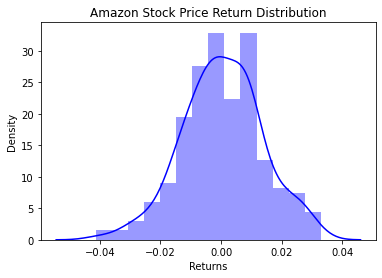

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(amzn_df['Returns'],color="b",kde=True,vertical=False)
plt.title('Amazon Stock Price Return Distribution')
plt.show()



In [9]:
googl_df['Returns']=(googl_df['Open']-googl_df['Close'])/googl_df['Open']
googl_df['Returns'].head()

0   -0.008847
1    0.019244
2   -0.008672
3   -0.013304
4   -0.027554
Name: Returns, dtype: float64

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


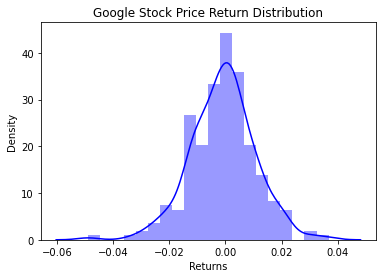

In [10]:
sns.distplot(googl_df['Returns'],color="b",kde=True,vertical=False)
plt.title('Google Stock Price Return Distribution')
plt.show()

In [11]:
aapl_df['Returns']=(aapl_df['Open']-aapl_df['Close'])/aapl_df['Open']
aapl_df['Returns'].head()

0    0.010367
1    0.030782
2   -0.016448
3    0.008769
4   -0.019944
Name: Returns, dtype: float64

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


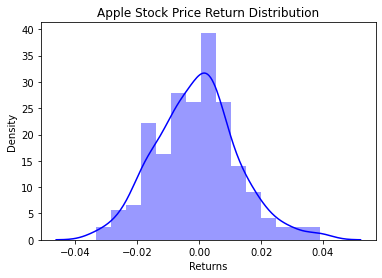

In [12]:
sns.distplot(aapl_df['Returns'],color="b",kde=True,vertical=False)
plt.title('Apple Stock Price Return Distribution')
plt.show()

In [13]:
import numpy as np
mean_amzn_return=np.round(amzn_df['Returns'].mean(),5)
std_dev_return=np.round(amzn_df['Returns'].std(),2)



C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


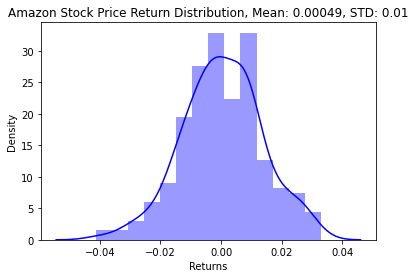

In [14]:
sns.distplot(amzn_df['Returns'],color="b",kde=True,vertical=False)
plt.title(f'Amazon Stock Price Return Distribution, Mean: {mean_amzn_return}, STD: {std_dev_return}')
plt.show()

In [15]:
amzn_df['Symbol']='AMZN'
googl_df['Symbol']='GOOGL'
aapl_df['Symbol']='AAPl'
df=pd.concat([amzn_df,googl_df,aapl_df])
df=df[['Symbol','Returns']]
df

,Symbol,Returns
0,AMZN,0.005518
1,AMZN,0.025495
2,AMZN,-0.016582
3,AMZN,0.002574
4,AMZN,-0.001634
...,...,...
248,AAPl,-0.018296
249,AAPl,0.004829
250,AAPl,-0.000279
251,AAPl,0.007076


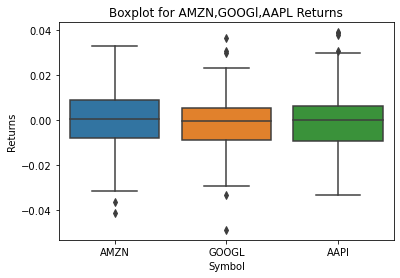

In [16]:
sns.boxplot(x="Symbol",y="Returns",data=df)
plt.title('Boxplot for AMZN,GOOGl,AAPL Returns')
plt.show()

In [17]:
q1,q3=amzn_df['Returns'].quantile([0.25,0.75])
q1

-0.007929535519020134

In [18]:
q3

0.008906684027777778

In [19]:
IQR=q3-q1
IQR

0.016836219546797912

In [20]:
Outlier1=q1-1.5*IQR
Outlier2=q3 + 1.5*IQR

In [21]:
Outlier1

-0.033183864839217

In [22]:
Outlier2

0.034161013347974646

In [23]:
amzn_df['Returns'].min()

-0.04125363752997978

In [24]:
df_corr = pd.DataFrame({'AMZN':amzn_df['Returns'], 'GOOGL':googl_df['Returns'], 'AAPL':aapl_df['Returns']})

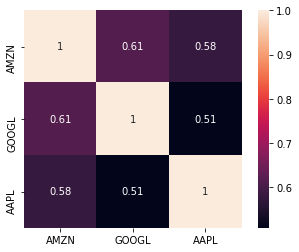

In [25]:
sns.heatmap(df_corr.corr(),square=True,annot=True)
plt.show()


In [26]:
amzn_df2=amzn.reset_index()
amzn_df2

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-12-31,3282.919922,3241.199951,3275.000000,3256.929932,2957200,3256.929932
1,2021-01-04,3272.000000,3144.020020,3270.000000,3186.629883,4411400,3186.629883
2,2021-01-05,3223.379883,3165.060059,3166.010010,3218.510010,2655500,3218.510010
3,2021-01-06,3197.510010,3131.159912,3146.479980,3138.379883,4394800,3138.379883
4,2021-01-07,3208.540039,3155.000000,3157.000000,3162.159912,3514500,3162.159912
...,...,...,...,...,...,...,...
248,2021-12-27,3458.860107,3384.310059,3420.739990,3393.389893,2934400,3393.389893
249,2021-12-28,3443.520020,3382.709961,3403.649902,3413.219971,2731900,3413.219971
250,2021-12-29,3424.239990,3372.010010,3416.800049,3384.020020,1787700,3384.020020
251,2021-12-30,3417.760010,3370.479980,3394.000000,3372.889893,1879200,3372.889893


In [27]:
amzn_df['date']=amzn_df2['Date']
amzn_df

,High,Low,Open,Close,Volume,Adj Close,Returns,Symbol,date
0,3282.919922,3241.199951,3275.000000,3256.929932,2957200,3256.929932,0.005518,AMZN,2020-12-31
1,3272.000000,3144.020020,3270.000000,3186.629883,4411400,3186.629883,0.025495,AMZN,2021-01-04
2,3223.379883,3165.060059,3166.010010,3218.510010,2655500,3218.510010,-0.016582,AMZN,2021-01-05
3,3197.510010,3131.159912,3146.479980,3138.379883,4394800,3138.379883,0.002574,AMZN,2021-01-06
4,3208.540039,3155.000000,3157.000000,3162.159912,3514500,3162.159912,-0.001634,AMZN,2021-01-07
...,...,...,...,...,...,...,...,...,...
248,3458.860107,3384.310059,3420.739990,3393.389893,2934400,3393.389893,0.007995,AMZN,2021-12-27
249,3443.520020,3382.709961,3403.649902,3413.219971,2731900,3413.219971,-0.002812,AMZN,2021-12-28
250,3424.239990,3372.010010,3416.800049,3384.020020,1787700,3384.020020,0.009594,AMZN,2021-12-29
251,3417.760010,3370.479980,3394.000000,3372.889893,1879200,3372.889893,0.006220,AMZN,2021-12-30


In [28]:

threshold=datetime.datetime(2021,1,1)
amzn_df = amzn_df[amzn_df['date'] > threshold]
amzn_df['SMA_10'] = amzn_df['Close'].rolling(window=10).mean()
amzn_df

<ipython-input-28-def05907da9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['SMA_10'] = amzn_df['Close'].rolling(window=10).mean()


,High,Low,Open,Close,Volume,Adj Close,Returns,Symbol,date,SMA_10
1,3272.000000,3144.020020,3270.000000,3186.629883,4411400,3186.629883,0.025495,AMZN,2021-01-04,NaN
2,3223.379883,3165.060059,3166.010010,3218.510010,2655500,3218.510010,-0.016582,AMZN,2021-01-05,NaN
3,3197.510010,3131.159912,3146.479980,3138.379883,4394800,3138.379883,0.002574,AMZN,2021-01-06,NaN
4,3208.540039,3155.000000,3157.000000,3162.159912,3514500,3162.159912,-0.001634,AMZN,2021-01-07,NaN
5,3190.639893,3142.199951,3180.000000,3182.699951,3537700,3182.699951,-0.000849,AMZN,2021-01-08,NaN
...,...,...,...,...,...,...,...,...,...,...
248,3458.860107,3384.310059,3420.739990,3393.389893,2934400,3393.389893,0.007995,AMZN,2021-12-27,3400.267041
249,3443.520020,3382.709961,3403.649902,3413.219971,2731900,3413.219971,-0.002812,AMZN,2021-12-28,3402.454028
250,3424.239990,3372.010010,3416.800049,3384.020020,1787700,3384.020020,0.009594,AMZN,2021-12-29,3402.673022
251,3417.760010,3370.479980,3394.000000,3372.889893,1879200,3372.889893,0.006220,AMZN,2021-12-30,3393.332007


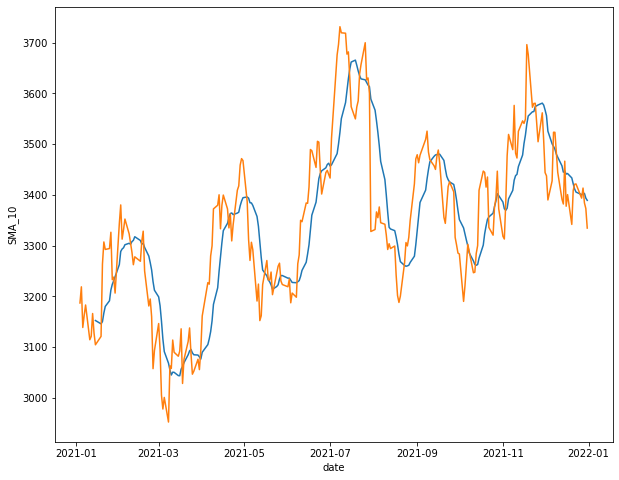

In [29]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=amzn_df.date,y=amzn_df.SMA_10,data=amzn_df)
sns.lineplot(x=amzn_df.date,y=amzn_df['Adj Close'],data=amzn_df)
plt.show()

In [30]:
#amzn_df['Close'].rolling(window=10).mean()

In [31]:
googl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,1757.500000,1736.089966,1737.270020,1752.640015,1053500,1752.640015
2021-01-04,1762.489990,1707.140015,1760.000000,1726.130005,1866200,1726.130005
2021-01-05,1746.829956,1716.900024,1725.089966,1740.050049,1018000,1740.050049
2021-01-06,1743.969971,1696.099976,1700.260010,1722.880005,2329400,1722.880005
2021-01-07,1777.819946,1726.760010,1726.760010,1774.339966,2096800,1774.339966


In [32]:
googl=googl.reset_index()
googl

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-12-31,1757.500000,1736.089966,1737.270020,1752.640015,1053500,1752.640015
1,2021-01-04,1762.489990,1707.140015,1760.000000,1726.130005,1866200,1726.130005
2,2021-01-05,1746.829956,1716.900024,1725.089966,1740.050049,1018000,1740.050049
3,2021-01-06,1743.969971,1696.099976,1700.260010,1722.880005,2329400,1722.880005
4,2021-01-07,1777.819946,1726.760010,1726.760010,1774.339966,2096800,1774.339966
...,...,...,...,...,...,...,...
248,2021-12-27,2966.879883,2943.389893,2945.120117,2958.129883,798800,2958.129883
249,2021-12-28,2965.979980,2921.090088,2964.719971,2933.739990,910000,2933.739990
250,2021-12-29,2948.340088,2912.949951,2932.889893,2933.100098,889400,2933.100098
251,2021-12-30,2946.000000,2919.889893,2933.879883,2924.010010,784400,2924.010010


In [33]:
googl_df

,High,Low,Open,Close,Volume,Adj Close,Returns,Symbol
0,1757.500000,1736.089966,1737.270020,1752.640015,1053500,1752.640015,-0.008847,GOOGL
1,1762.489990,1707.140015,1760.000000,1726.130005,1866200,1726.130005,0.019244,GOOGL
2,1746.829956,1716.900024,1725.089966,1740.050049,1018000,1740.050049,-0.008672,GOOGL
3,1743.969971,1696.099976,1700.260010,1722.880005,2329400,1722.880005,-0.013304,GOOGL
4,1777.819946,1726.760010,1726.760010,1774.339966,2096800,1774.339966,-0.027554,GOOGL
...,...,...,...,...,...,...,...,...
248,2966.879883,2943.389893,2945.120117,2958.129883,798800,2958.129883,-0.004417,GOOGL
249,2965.979980,2921.090088,2964.719971,2933.739990,910000,2933.739990,0.010450,GOOGL
250,2948.340088,2912.949951,2932.889893,2933.100098,889400,2933.100098,-0.000072,GOOGL
251,2946.000000,2919.889893,2933.879883,2924.010010,784400,2924.010010,0.003364,GOOGL


In [34]:
googl_df['date']=googl['Date']
googl_df

,High,Low,Open,Close,Volume,Adj Close,Returns,Symbol,date
0,1757.500000,1736.089966,1737.270020,1752.640015,1053500,1752.640015,-0.008847,GOOGL,2020-12-31
1,1762.489990,1707.140015,1760.000000,1726.130005,1866200,1726.130005,0.019244,GOOGL,2021-01-04
2,1746.829956,1716.900024,1725.089966,1740.050049,1018000,1740.050049,-0.008672,GOOGL,2021-01-05
3,1743.969971,1696.099976,1700.260010,1722.880005,2329400,1722.880005,-0.013304,GOOGL,2021-01-06
4,1777.819946,1726.760010,1726.760010,1774.339966,2096800,1774.339966,-0.027554,GOOGL,2021-01-07
...,...,...,...,...,...,...,...,...,...
248,2966.879883,2943.389893,2945.120117,2958.129883,798800,2958.129883,-0.004417,GOOGL,2021-12-27
249,2965.979980,2921.090088,2964.719971,2933.739990,910000,2933.739990,0.010450,GOOGL,2021-12-28
250,2948.340088,2912.949951,2932.889893,2933.100098,889400,2933.100098,-0.000072,GOOGL,2021-12-29
251,2946.000000,2919.889893,2933.879883,2924.010010,784400,2924.010010,0.003364,GOOGL,2021-12-30


In [35]:
googl_df = googl_df[googl_df['date'] > threshold]
googl_df['SMA_10'] = googl_df['Close'].rolling(window=10).mean()
googl_df

<ipython-input-35-c96432f6442e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googl_df['SMA_10'] = googl_df['Close'].rolling(window=10).mean()


,High,Low,Open,Close,Volume,Adj Close,Returns,Symbol,date,SMA_10
1,1762.489990,1707.140015,1760.000000,1726.130005,1866200,1726.130005,0.019244,GOOGL,2021-01-04,NaN
2,1746.829956,1716.900024,1725.089966,1740.050049,1018000,1740.050049,-0.008672,GOOGL,2021-01-05,NaN
3,1743.969971,1696.099976,1700.260010,1722.880005,2329400,1722.880005,-0.013304,GOOGL,2021-01-06,NaN
4,1777.819946,1726.760010,1726.760010,1774.339966,2096800,1774.339966,-0.027554,GOOGL,2021-01-07,NaN
5,1799.359985,1761.219971,1777.160034,1797.829956,1774200,1797.829956,-0.011631,GOOGL,2021-01-08,NaN
...,...,...,...,...,...,...,...,...,...,...
248,2966.879883,2943.389893,2945.120117,2958.129883,798800,2958.129883,-0.004417,GOOGL,2021-12-27,2897.323975
249,2965.979980,2921.090088,2964.719971,2933.739990,910000,2933.739990,0.010450,GOOGL,2021-12-28,2899.044971
250,2948.340088,2912.949951,2932.889893,2933.100098,889400,2933.100098,-0.000072,GOOGL,2021-12-29,2904.540991
251,2946.000000,2919.889893,2933.879883,2924.010010,784400,2924.010010,0.003364,GOOGL,2021-12-30,2904.059985


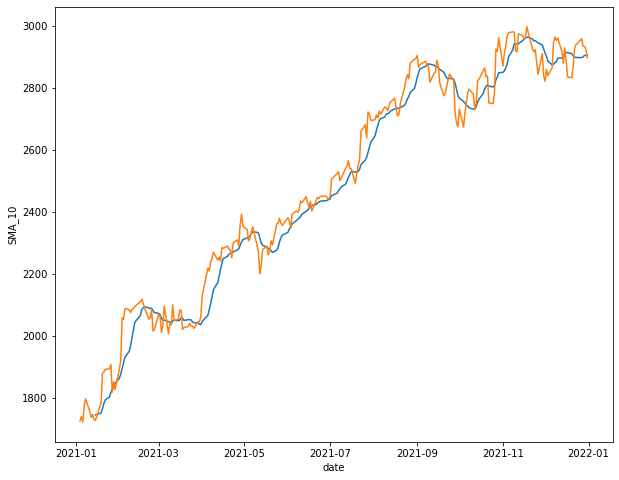

In [36]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=googl_df.date,y=googl_df.SMA_10,data=googl_df)
sns.lineplot(x=googl_df.date,y=googl_df['Adj Close'],data=googl_df)
plt.show()

In [37]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.709213
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.453445
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.041611
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.664215
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.952286


In [38]:
aapl=aapl.reset_index()
aapl

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.709213
1,2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.453445
2,2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.041611
3,2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.664215
4,2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.952286
...,...,...,...,...,...,...,...
248,2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
249,2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
250,2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
251,2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251


In [39]:
aapl_df['date']=aapl['Date']
aapl_df

,High,Low,Open,Close,Volume,Adj Close,Returns,Symbol,date
0,134.740005,131.720001,134.080002,132.690002,99116600.0,131.709213,0.010367,AAPl,2020-12-31
1,133.610001,126.760002,133.520004,129.410004,143301900.0,128.453445,0.030782,AAPl,2021-01-04
2,131.740005,128.429993,128.889999,131.009995,97664900.0,130.041611,-0.016448,AAPl,2021-01-05
3,131.050003,126.379997,127.720001,126.599998,155088000.0,125.664215,0.008769,AAPl,2021-01-06
4,131.630005,127.860001,128.360001,130.919998,109578200.0,129.952286,-0.019944,AAPl,2021-01-07
...,...,...,...,...,...,...,...,...,...
248,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540,-0.018296,AAPl,2021-12-27
249,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859,0.004829,AAPl,2021-12-28
250,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749,-0.000279,AAPl,2021-12-29
251,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251,0.007076,AAPl,2021-12-30


In [40]:
aapl_df = aapl_df[aapl_df['date'] > threshold]
aapl_df['SMA_10'] = aapl_df['Close'].rolling(window=10).mean()
aapl_df

<ipython-input-40-82d98be62084>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['SMA_10'] = aapl_df['Close'].rolling(window=10).mean()


,High,Low,Open,Close,Volume,Adj Close,Returns,Symbol,date,SMA_10
1,133.610001,126.760002,133.520004,129.410004,143301900.0,128.453445,0.030782,AAPl,2021-01-04,NaN
2,131.740005,128.429993,128.889999,131.009995,97664900.0,130.041611,-0.016448,AAPl,2021-01-05,NaN
3,131.050003,126.379997,127.720001,126.599998,155088000.0,125.664215,0.008769,AAPl,2021-01-06,NaN
4,131.630005,127.860001,128.360001,130.919998,109578200.0,129.952286,-0.019944,AAPl,2021-01-07,NaN
5,132.630005,130.229996,132.429993,132.050003,105158200.0,131.073914,0.002869,AAPl,2021-01-08,NaN
...,...,...,...,...,...,...,...,...,...,...
248,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540,-0.018296,AAPl,2021-12-27,174.776001
249,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859,0.004829,AAPl,2021-12-28,175.131000
250,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749,-0.000279,AAPl,2021-12-29,175.636000
251,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251,0.007076,AAPl,2021-12-30,175.525999


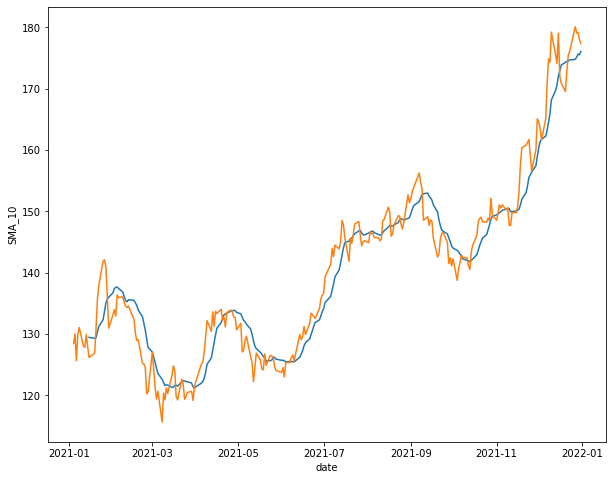

In [41]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=aapl_df.date,y=aapl_df.SMA_10,data=aapl_df)
sns.lineplot(x=aapl_df.date,y=aapl_df['Adj Close'],data=aapl_df)
plt.show()

In [42]:
amzn_df

,High,Low,Open,Close,Volume,Adj Close,Returns,Symbol,date,SMA_10
1,3272.000000,3144.020020,3270.000000,3186.629883,4411400,3186.629883,0.025495,AMZN,2021-01-04,NaN
2,3223.379883,3165.060059,3166.010010,3218.510010,2655500,3218.510010,-0.016582,AMZN,2021-01-05,NaN
3,3197.510010,3131.159912,3146.479980,3138.379883,4394800,3138.379883,0.002574,AMZN,2021-01-06,NaN
4,3208.540039,3155.000000,3157.000000,3162.159912,3514500,3162.159912,-0.001634,AMZN,2021-01-07,NaN
5,3190.639893,3142.199951,3180.000000,3182.699951,3537700,3182.699951,-0.000849,AMZN,2021-01-08,NaN
...,...,...,...,...,...,...,...,...,...,...
248,3458.860107,3384.310059,3420.739990,3393.389893,2934400,3393.389893,0.007995,AMZN,2021-12-27,3400.267041
249,3443.520020,3382.709961,3403.649902,3413.219971,2731900,3413.219971,-0.002812,AMZN,2021-12-28,3402.454028
250,3424.239990,3372.010010,3416.800049,3384.020020,1787700,3384.020020,0.009594,AMZN,2021-12-29,3402.673022
251,3417.760010,3370.479980,3394.000000,3372.889893,1879200,3372.889893,0.006220,AMZN,2021-12-30,3393.332007


In [43]:

amzn_df['sma_std']=amzn_df['Adj Close'].rolling(window=20).std()


<ipython-input-43-de1680d4a3b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['sma_std']=amzn_df['Adj Close'].rolling(window=20).std()


<ipython-input-44-88e507f83975>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['Upper Band'] = amzn_df['SMA_10'] + (amzn_df['sma_std'] * 2)
<ipython-input-44-88e507f83975>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['Lower Band'] = amzn_df['SMA_10'] - (amzn_df['sma_std'] * 2)


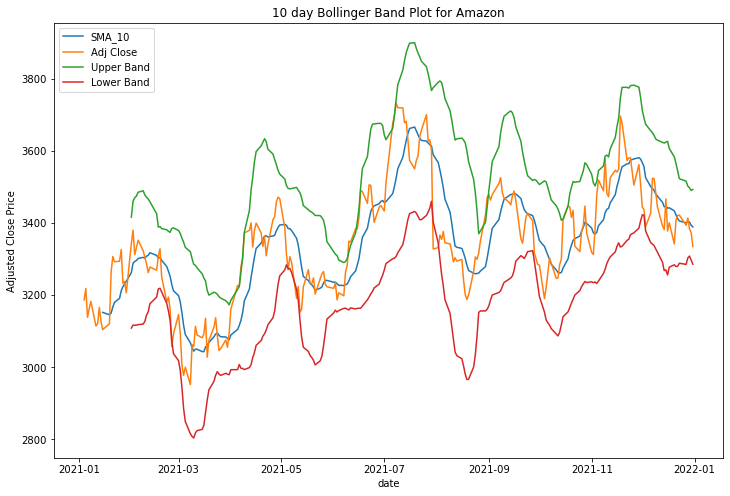

In [44]:
amzn_df['Upper Band'] = amzn_df['SMA_10'] + (amzn_df['sma_std'] * 2)
amzn_df['Lower Band'] = amzn_df['SMA_10'] - (amzn_df['sma_std'] * 2)
plt.figure(figsize=(12, 8))
sns.lineplot(x=amzn_df.date,y=amzn_df['SMA_10'],data=amzn_df)
sns.lineplot(x=amzn_df.date,y=amzn_df['Adj Close'],data=amzn_df)
sns.lineplot(x=amzn_df.date,y=amzn_df['Upper Band'],data=amzn_df)
sns.lineplot(x=amzn_df.date,y=amzn_df['Lower Band'],data=amzn_df)
plt.ylabel('Adjusted Close Price')
plt.title('10 day Bollinger Band Plot for Amazon')
plt.legend(['SMA_10','Adj Close','Upper Band','Lower Band'])
plt.show()


In [45]:
googl_df['sma_std']=googl_df['Adj Close'].rolling(window=20).std()

<ipython-input-45-e05c5c300d10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googl_df['sma_std']=googl_df['Adj Close'].rolling(window=20).std()


<ipython-input-46-db215c04c500>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googl_df['Upper Band'] = googl_df['SMA_10'] + (googl_df['sma_std'] * 2)
<ipython-input-46-db215c04c500>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googl_df['Lower Band'] = googl_df['SMA_10'] - (googl_df['sma_std'] * 2)


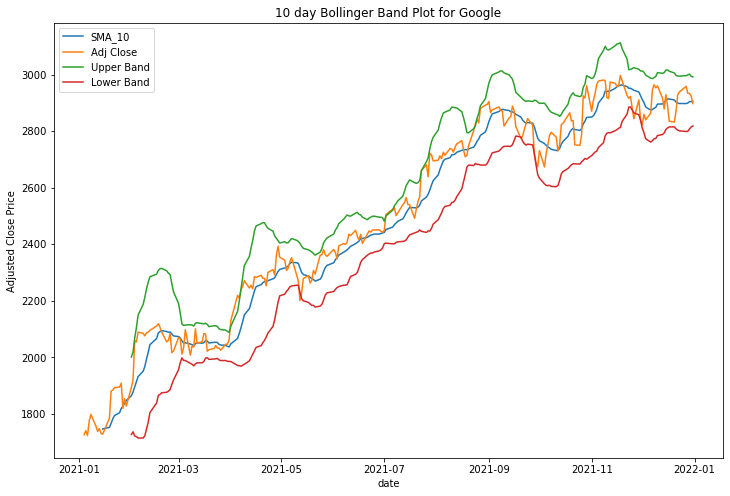

In [46]:
googl_df['Upper Band'] = googl_df['SMA_10'] + (googl_df['sma_std'] * 2)
googl_df['Lower Band'] = googl_df['SMA_10'] - (googl_df['sma_std'] * 2)
plt.figure(figsize=(12, 8))
sns.lineplot(x=googl_df.date,y=googl_df['SMA_10'],data=googl_df)
sns.lineplot(x=googl_df.date,y=googl_df['Adj Close'],data=googl_df)
sns.lineplot(x=googl_df.date,y=googl_df['Upper Band'],data=googl_df)
sns.lineplot(x=googl_df.date,y=googl_df['Lower Band'],data=googl_df)
plt.ylabel('Adjusted Close Price')
plt.title('10 day Bollinger Band Plot for Google')
plt.legend(['SMA_10','Adj Close','Upper Band','Lower Band'])
plt.show()


In [47]:
aapl_df['sma_std']=aapl_df['Adj Close'].rolling(window=20).std()

<ipython-input-47-82771b37dec4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['sma_std']=aapl_df['Adj Close'].rolling(window=20).std()


<ipython-input-48-5344002e421d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['Upper Band'] = aapl_df['SMA_10'] + (aapl_df['sma_std'] * 2)
<ipython-input-48-5344002e421d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['Lower Band'] = aapl_df['SMA_10'] - (aapl_df['sma_std'] * 2)


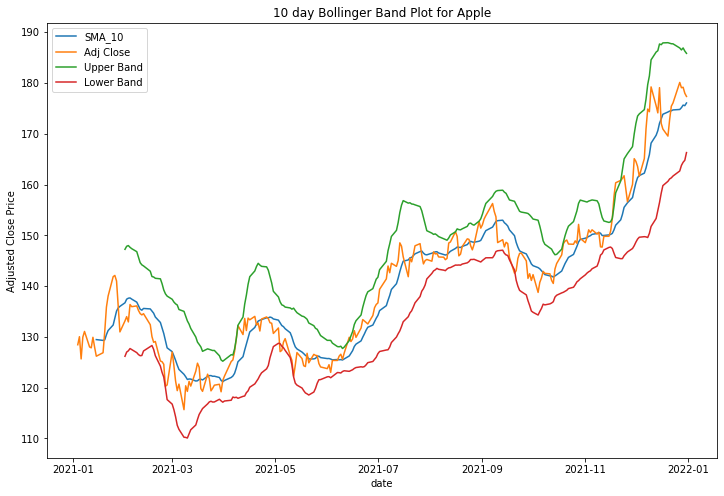

In [48]:
aapl_df['Upper Band'] = aapl_df['SMA_10'] + (aapl_df['sma_std'] * 2)
aapl_df['Lower Band'] = aapl_df['SMA_10'] - (aapl_df['sma_std'] * 2)
plt.figure(figsize=(12, 8))
sns.lineplot(x=aapl_df.date,y=aapl_df['SMA_10'],data=aapl_df)
sns.lineplot(x=aapl_df.date,y=aapl_df['Adj Close'],data=aapl_df)
sns.lineplot(x=aapl_df.date,y=aapl_df['Upper Band'],data=aapl_df)
sns.lineplot(x=aapl_df.date,y=aapl_df['Lower Band'],data=aapl_df)
plt.ylabel('Adjusted Close Price')
plt.title('10 day Bollinger Band Plot for Apple')
plt.legend(['SMA_10','Adj Close','Upper Band','Lower Band'])
plt.show()
